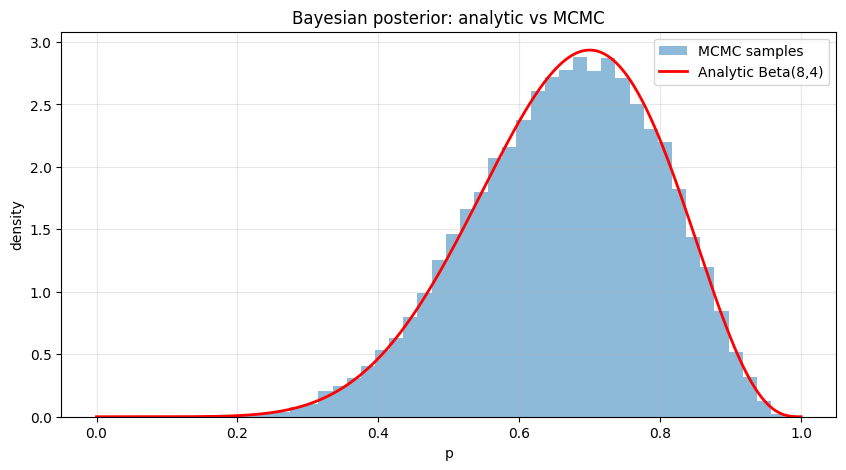

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data
n = 10  # total trials
k = 7   # successes

# Prior Beta(a,b)
a, b = 1, 1

# Analytic posterior Beta(ap, bp)
ap = a + k
bp = b + (n - k)

# Beta pdf (manual implementation)
from math import gamma

def beta_pdf(x, ap, bp):
    B = gamma(ap) * gamma(bp) / gamma(ap + bp)
    return (x**(ap-1)) * ((1-x)**(bp-1)) / B

x = np.linspace(0, 1, 500)
pdf_true = beta_pdf(x, ap, bp)

# MCMC: Metropolis
def log_post(p):
    if p <= 0.0 or p >= 1.0:
        return -np.inf
    return (k + a - 1) * np.log(p) + (n - k + b - 1) * np.log(1 - p)

def metropolis(T=50000, burn=8000, proposal_sd=0.08, seed=0):
    rng = np.random.default_rng(seed)
    p = 0.5
    lp = log_post(p)
    samples = []

    for t in range(T):
        p_new = p + rng.normal(0, proposal_sd)
        lp_new = log_post(p_new)
        if np.log(rng.random()) < (lp_new - lp):
            p = p_new
            lp = lp_new
        samples.append(p)

    return np.array(samples[burn:])

post = metropolis()

# Plot
plt.figure(figsize=(10,5))
plt.hist(post, bins=40, density=True, alpha=0.5, label="MCMC samples")
plt.plot(x, pdf_true, "r-", linewidth=2, label="Analytic Beta(8,4)")
plt.xlabel("p")
plt.ylabel("density")
plt.title("Bayesian posterior: analytic vs MCMC")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
